# Experimento de Franck-Hertz

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [2]:
sns.set_theme()
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 120

Dados

In [3]:
data = {}

for file in os.listdir('dados/excitacao/'):
	if file not in ['checkpoints', '.ipynb_checkpoints']:
		T, Vr = file.split('_')[1:3]

		T = int(T)
		Vr = float( int(Vr.split('.')[0]) / 100 )

		if T not in data: data[T] = {}
		if Vr not in data[T]: data[T][Vr] = { 'Tensão (V)': [], 'Corrente (A)': [], 'Temperatura (°C)': [] }

		load_data = np.loadtxt(f'dados/excitacao//{file}').transpose()
		data[T][Vr]['Tensão (V)'] = load_data[0]
		data[T][Vr]['Corrente (A)'] = load_data[1]
		data[T][Vr]['Temperatura (°C)'] = load_data[2]

		data[T][Vr] = pd.DataFrame(data[T][Vr])

T = 190
for i,Vr in enumerate(data[T].keys()):
	data[T][Vr]['Corrente (A)'] += 0.15

In [4]:
peaks = {}

for i,T in enumerate(data.keys()):
  peaks[T] = {}

## Determinação dos picos de corrente

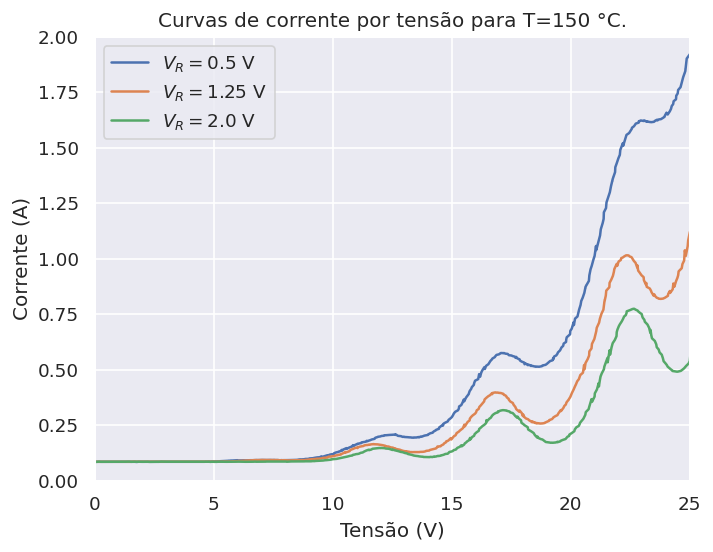

In [5]:
T = 150
plt.title(f'Curvas de corrente por tensão para T={T} °C.')

for i,Vr in enumerate([ 0.5, 1.25, 2.0 ]):
  df = data[T][Vr]

  Tm, Ts = df["Temperatura (°C)"].mean(), df["Temperatura (°C)"].std() / np.sqrt(df.shape[0])
  sns.lineplot(data=df, x='Tensão (V)', y='Corrente (A)', label=f'$V_R={Vr}$ V')

  _peaks, props = find_peaks(df['Corrente (A)'], distance=40, prominence=(0.005, 5))
  peaks[T][Vr] = np.array(_peaks)

  # sns.scatterplot(x=df['Tensão (V)'][_peaks], y=df['Corrente (A)'][_peaks], color='red', marker='x')

plt.ylim(0, 2)
plt.xlim(0, 25)

plt.savefig(f'plots/current_curves_{T}.png', dpi=300, bbox_inches='tight')
plt.show()

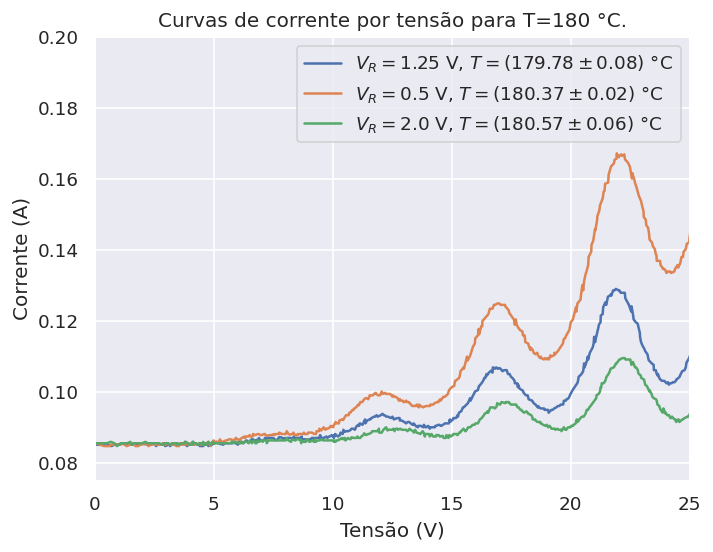

In [6]:
T = 180
plt.title(f'Curvas de corrente por tensão para T={T} °C.')

for i,Vr in enumerate(data[T].keys()):
  df = data[T][Vr]

  Tm, Ts = df["Temperatura (°C)"].mean(), df["Temperatura (°C)"].std() / np.sqrt(df.shape[0])
  sns.lineplot(data=df, x='Tensão (V)', y='Corrente (A)', label=f'$V_R={Vr}$ V')

  _peaks, props = find_peaks(df['Corrente (A)'], distance=40, prominence=(0.002, 5))
  peaks[T][Vr] = np.array(_peaks)

  #sns.scatterplot(x=df['Tensão (V)'][_peaks], y=df['Corrente (A)'][_peaks], color='red', marker='x')

plt.ylim(0.075, 0.2)
plt.xlim(0, 25)

plt.savefig(f'plots/current_curves_{T}.png', dpi=300, bbox_inches='tight')
plt.show()

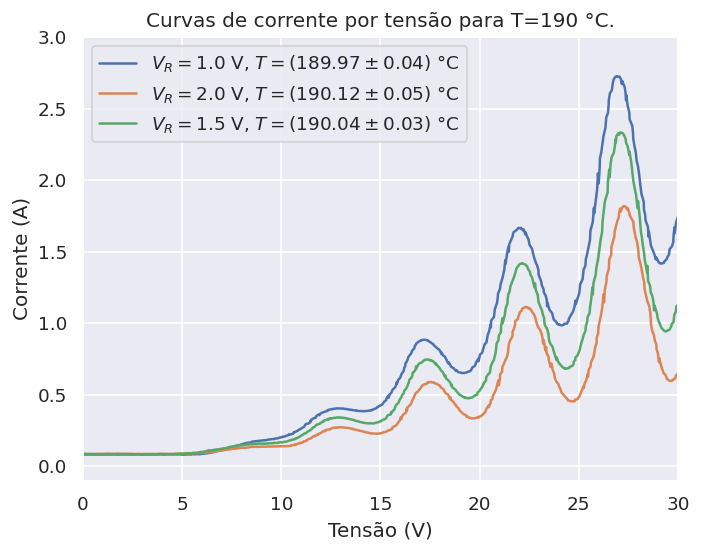

In [7]:
T = 190
plt.title(f'Curvas de corrente por tensão para T={T} °C.')

for i,Vr in enumerate(data[T].keys()):
  df = data[T][Vr]

  Tm, Ts = df["Temperatura (°C)"].mean(), df["Temperatura (°C)"].std() / np.sqrt(df.shape[0])
  sns.lineplot(data=df, x='Tensão (V)', y='Corrente (A)', label=f'$V_R={Vr}$ V')

  _peaks, props = find_peaks(df['Corrente (A)'], distance=40, prominence=(0.004, 5))
  peaks[T][Vr] = np.array(_peaks)

  #sns.scatterplot(x=df['Tensão (V)'][_peaks], y=df['Corrente (A)'][_peaks], color='red', marker='x')

plt.ylim(-0.1, 3)
plt.xlim(0, 30)

plt.savefig(f'plots/current_curves_{T}.png', dpi=300, bbox_inches='tight')
plt.show()

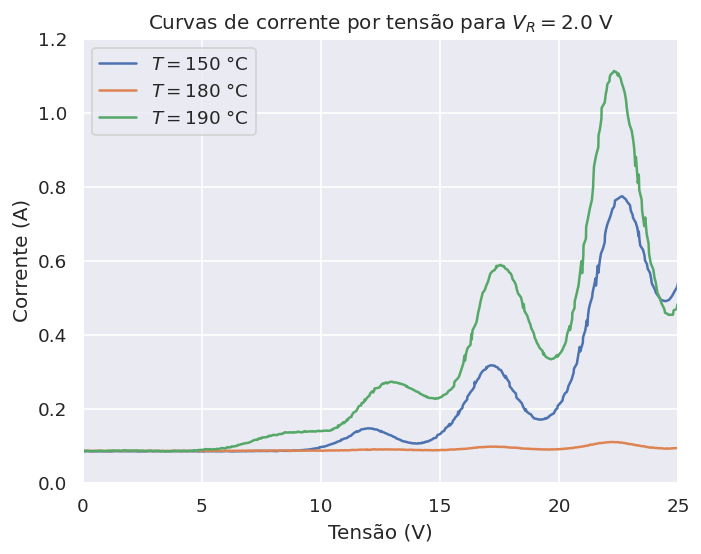

In [8]:
Vr = 2.0
plt.title(f'Curvas de corrente por tensão para $V_R={Vr}$ V')

for i,T in enumerate([ 150, 180, 190 ]):
  df = data[T][Vr]

  sns.lineplot(data=df, x='Tensão (V)', y='Corrente (A)', label=f'$T={T}$ °C')

plt.ylim(0, 1.2)
plt.xlim(0, 25)

plt.savefig(f'plots/current_curves_Vr{Vr}.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
for i,T in enumerate(peaks.keys()):
	for j,Vr in enumerate(peaks[T].keys()):
		print('{} - {}:\t{}'.format(T, Vr, list(data[T][Vr]['Tensão (V)'][peaks[T][Vr]])))

190 - 1.0:	[12.83, 17.15, 21.98, 26.9]
190 - 2.0:	[13.0, 17.55, 22.31, 27.25]
190 - 1.5:	[12.85, 17.34, 22.13, 27.12]
150 - 0.5:	[12.65, 17.1, 23.09]
150 - 1.25:	[11.73, 16.83, 22.32]
150 - 2.0:	[12.03, 17.15, 22.65]
180 - 1.25:	[12.09, 17.0, 21.89]
180 - 0.5:	[12.06, 17.0, 21.93]
180 - 2.0:	[12.24, 17.09, 22.23]


In [10]:
df_peaks = {}

for i,T in enumerate(peaks.keys()):
  df_peaks[T] = {}
  for j,Vr in enumerate(peaks[T].keys()):
    df_peaks[T][Vr] = pd.DataFrame({
      'Tensão (V)': data[T][Vr]['Tensão (V)'][ peaks[T][Vr] ],
      'Corrente (A)': data[T][Vr]['Corrente (A)'][ peaks[T][Vr] ]
    })

## Determinação do potencial $V_0$

Estimativa para o valor de $V_0$ a partir das diferenças das tensões dos picos.

In [11]:
deltas = []

for i,T in enumerate(data.keys()):
  for j,Vr in enumerate(data[T].keys()):
    df = data[T][Vr]

    ddp = np.array(df['Tensão (V)'][ peaks[T][Vr] ])
    Dddp = ddp - np.roll(ddp, 1)

    deltas = np.append(deltas, Dddp[1:])

In [12]:
len(deltas)

21

In [13]:
V0, V0s = np.mean(deltas), np.std(deltas) / np.sqrt(len(deltas))
V0, V0s

(4.947619047619047, 0.08075579705651756)

### Ajuste quadrático

In [14]:
def quad(x, a, b): return a * np.power(x, 2) + b
def inQuad(y, a, b): return np.sqrt(np.abs( (y - b) / a ))

In [15]:
fits = {}
square_voltages = {}

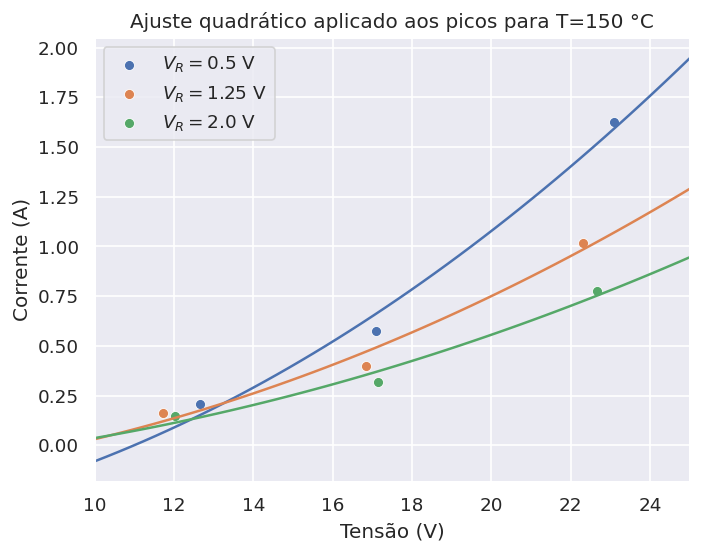

In [16]:
T = 150
fits[T] = {}
square_voltages[T] = {}

plt.title(f'Ajuste quadrático aplicado aos picos para T={T} °C')

for j,Vr in enumerate(df_peaks[T].keys()):
  df = df_peaks[T][Vr]

  popt, pcov = curve_fit(
      quad,
      xdata=df['Tensão (V)'],
      ydata=df['Corrente (A)']
  )

  fits[T][Vr] = popt

  square_voltages[T][Vr] = []
  for k,I in enumerate(df['Corrente (A)']): square_voltages[T][Vr].append(inQuad( I, popt[0], popt[1] ))

  x = np.linspace(10, 25)
  sns.lineplot(x=x, y=quad(x, popt[0], popt[1]))
  sns.scatterplot(x=df['Tensão (V)'], y=df['Corrente (A)'], label=f'$V_R={Vr}$ V')

plt.xlim(10, 25)
plt.savefig(f'plots/square_fit_peaks_{T}.png', dpi=300, bbox_inches='tight')
plt.show()

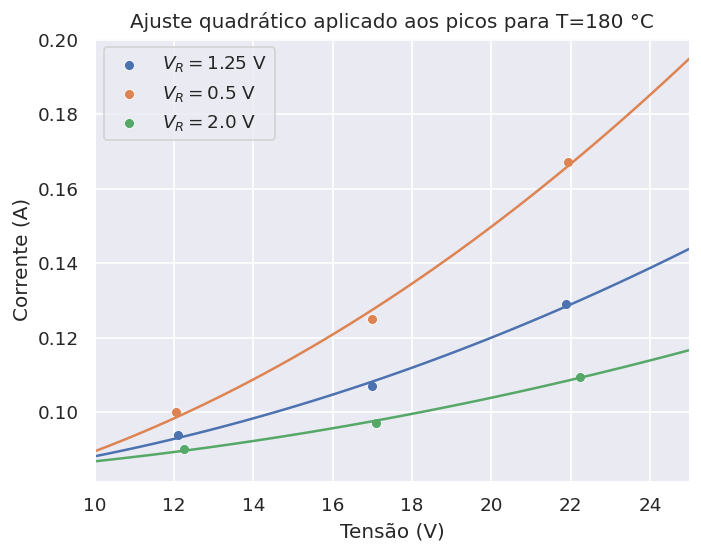

In [17]:
T = 180
fits[T] = {}
square_voltages[T] = {}

plt.title(f'Ajuste quadrático aplicado aos picos para T={T} °C')

for j,Vr in enumerate(df_peaks[T].keys()):
  df = df_peaks[T][Vr]

  popt, pcov = curve_fit(
      quad,
      xdata=df['Tensão (V)'],
      ydata=df['Corrente (A)']
  )

  fits[T][Vr] = popt

  square_voltages[T][Vr] = []
  for k,I in enumerate(df['Corrente (A)']): square_voltages[T][Vr].append(inQuad( I, popt[0], popt[1] ))

  x = np.linspace(10, 25)
  sns.lineplot(x=x, y=quad(x, popt[0], popt[1]))
  sns.scatterplot(x=df['Tensão (V)'], y=df['Corrente (A)'], label=f'$V_R={Vr}$ V')

plt.xlim(10, 25)
plt.savefig(f'plots/square_fit_peaks_{T}.png', dpi=300, bbox_inches='tight')
plt.show()

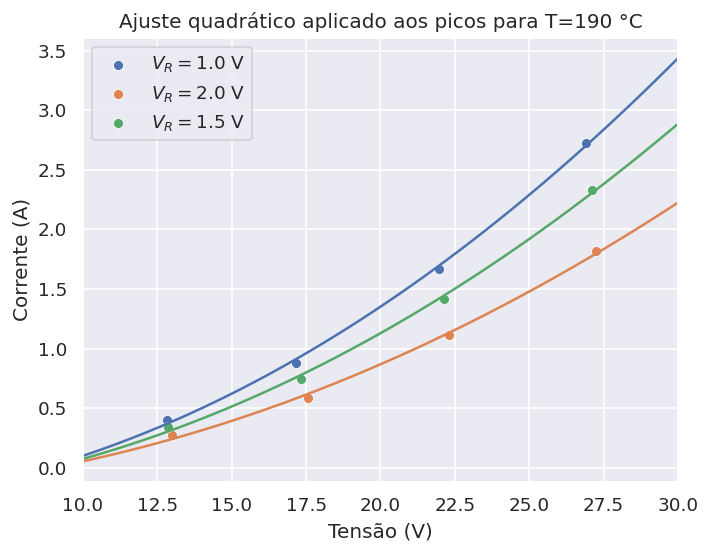

In [18]:
T = 190
fits[T] = {}
square_voltages[T] = {}

plt.title(f'Ajuste quadrático aplicado aos picos para T={T} °C')


for j,Vr in enumerate(df_peaks[T].keys()):
  df = df_peaks[T][Vr]

  popt, pcov = curve_fit(
      quad,
      xdata=df['Tensão (V)'],
      ydata=df['Corrente (A)']
  )

  fits[T][Vr] = popt

  square_voltages[T][Vr] = []
  for k,I in enumerate(df['Corrente (A)']): square_voltages[T][Vr].append(inQuad( I, popt[0], popt[1] ))

  x = np.linspace(10, 30)
  sns.lineplot(x=x, y=quad(x, popt[0], popt[1]))
  sns.scatterplot(x=df['Tensão (V)'], y=df['Corrente (A)'], label=f'$V_R={Vr}$ V')

plt.xlim(10, 30)
plt.savefig(f'plots/square_fit_peaks_{T}.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
xdata, ydata = np.array([]), np.array([])

for i,T in enumerate(square_voltages.keys()):
	for j,Vr in enumerate(square_voltages[T].keys()):
		ydata = np.append(ydata, square_voltages[T][Vr])
		xdata = np.append(xdata, range(1, len(square_voltages[T][Vr]) + 1))

In [20]:
fit_data = pd.DataFrame({ 'Peak': xdata, 'Voltage (V)': ydata })

In [21]:
voltages_m = np.array(fit_data.groupby('Peak').mean()).flatten()
voltages_s = np.array(fit_data.groupby('Peak').std()).flatten()

In [22]:
popt, pcov = curve_fit(
	lambda x, a, b: a * x + b,
	xdata=range(1, len(voltages_m) + 1),
	ydata=voltages_m,
	sigma=voltages_s
)

In [23]:
popt, np.sqrt(pcov)

/tmp/ipykernel_5820/2161760635.py:1: RuntimeWarning: invalid value encountered in sqrt
  popt, np.sqrt(pcov)


(array([4.92389491, 7.47917037]),
 array([[0.18773053,        nan],
        [       nan, 0.64926685]]))

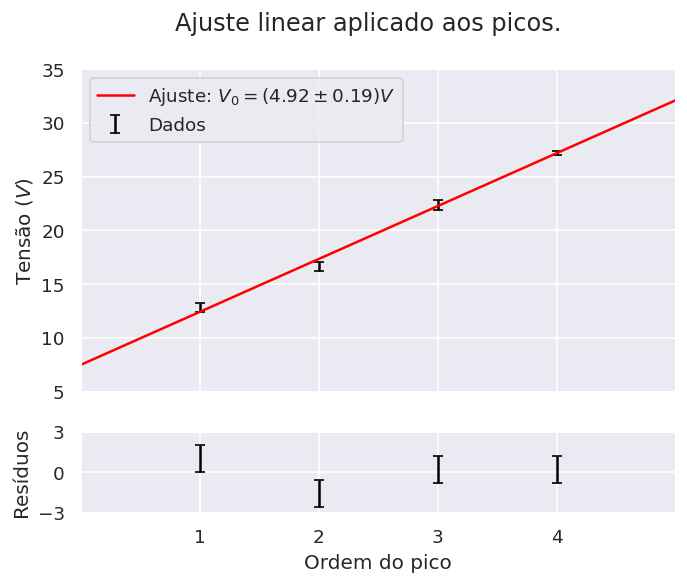

In [24]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={ 'height_ratios': (4,1) })
plt.suptitle('Ajuste linear aplicado aos picos.')

x = np.linspace(0, 5, 10)

axs[0].errorbar(
	x=range(1, len(voltages_m) + 1),
	y=voltages_m,
	yerr=voltages_s,
	color='black', fmt=' ', capsize=3, label='Dados'
)
sns.lineplot(x=x, y=popt[0]*x + popt[1], color='red', ax=axs[0], label=f'Ajuste: $V_0=({popt[0]:.2f}\pm{np.sqrt(pcov[0][0]):.2f})V$')

axs[1].errorbar(
	x=range(1, len(voltages_m) + 1),
	y=(voltages_m - popt[0] * np.arange(1, len(voltages_m) + 1) - popt[1]) / voltages_s,
	yerr=1,
	color='black', fmt=' ', capsize=3, label='Dados'
)

axs[0].set(ylabel='Tensão ($V$)', ylim=(5, 35))
axs[1].set(xlabel='Ordem do pico', ylabel='Resíduos', xlim=(0, 5), ylim=(-3,3), xticks=[1, 2, 3, 4], yticks=(-3, 0, 3))

plt.savefig('plots/linear_voltage_fit.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
np.sum((voltages_m - popt[0] * np.arange(1, len(voltages_m) + 1) - popt[1])**2 / voltages_s**2)

3.737223228950281